In [1]:
c0=1
sigma=2
def pixel_disparity(a,b,sigma=2):
    d=(a-b)**2
    d=d/(sigma**2)
    return d

In [2]:
import numpy as np
import cv2
def init_disparity_row(Ileft,Iright,row=200):
    # Pick a scanline (example row 200)
    Il = Ileft[row, :]
    Ir = Iright[row, :]
    # Make sure lengths match
    N = len(Il)
    assert len(Il) == len(Ir), "Left and right rows must be same length!"
    # Initialize cost matrix
    d = np.zeros((N, N), dtype=float)
    # Manually compute costs
    for i in range(N):
        for j in range(N):
            d[i, j] = pixel_disparity(Il[i], Ir[j])
    return d,N
    # d is now ready ✅


In [3]:
def row_matching(Ileft,Iright,row=200):
    d,N=init_disparity_row(Ileft,Iright,row)
    D=np.zeros((N, N), dtype=float)
    D[0,0]=d[0,0]
    # Step 2: Initialize first row and first column
    for i in range(1, N):
        D[i, 0] = D[i-1, 0] + c0
    for j in range(1, N):
        D[0, j] = D[0, j-1] + c0
    # Step 3: Fill the D matrix
    for i in range(1, N):
        for j in range(1, N):
            D[i, j] = min(
                D[i-1, j-1] + d[i, j],  # match
                D[i-1, j] + c0,         # skip left
                D[i, j-1] + c0          # skip right
            )
    return D,N,d

In [4]:
def backtracking(Ileft,Iright,row=200):
    D,N,d=row_matching(Ileft,Iright,row)
    i = N - 1
    j = N - 1
    disp_left = np.zeros(N)
    disp_right = np.zeros(N)
    while i > 0 and j > 0:
        if D[i, j] == D[i-1, j-1] + d[i, j]:
            # Match
            disp_left[i] = abs(i - j)
            disp_right[j] = abs(i - j)
            i -= 1
            j -= 1
        elif D[i, j] == D[i-1, j] + c0:
            # Skip left
            disp_left[i] = 0
            i -= 1
        else:
            # Skip right
            disp_right[j] = 0
            j -= 1
    # Handle boundary conditions
    while i > 0:
        disp_left[i] = 0
        i -= 1
    while j > 0:
        disp_right[j] = 0
        j -= 1
    return disp_left,disp_right

Left image shape: (289, 382)
Right image shape: (289, 382)


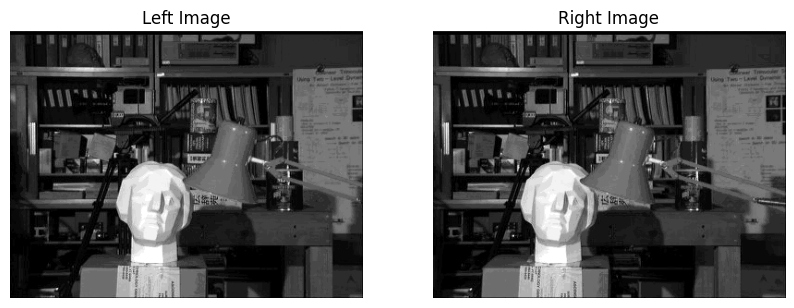

In [5]:
import cv2
import matplotlib.pyplot as plt
# Load images
l_path = "l1.png"
r_path = "r1.png"
Ileft = cv2.imread(l_path, cv2.IMREAD_GRAYSCALE)
Iright = cv2.imread(r_path, cv2.IMREAD_GRAYSCALE)
# Print size
print("Left image shape:", Ileft.shape)
print("Right image shape:", Iright.shape)
# Plot images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Ileft, cmap='gray')
plt.title('Left Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(Iright, cmap='gray')
plt.title('Right Image')
plt.axis('off')
plt.show()


C:\Users\mohamed ahmed\AppData\Local\Temp\ipykernel_35148\3461464341.py:4: RuntimeWarning: overflow encountered in scalar subtract
  d=(a-b)**2


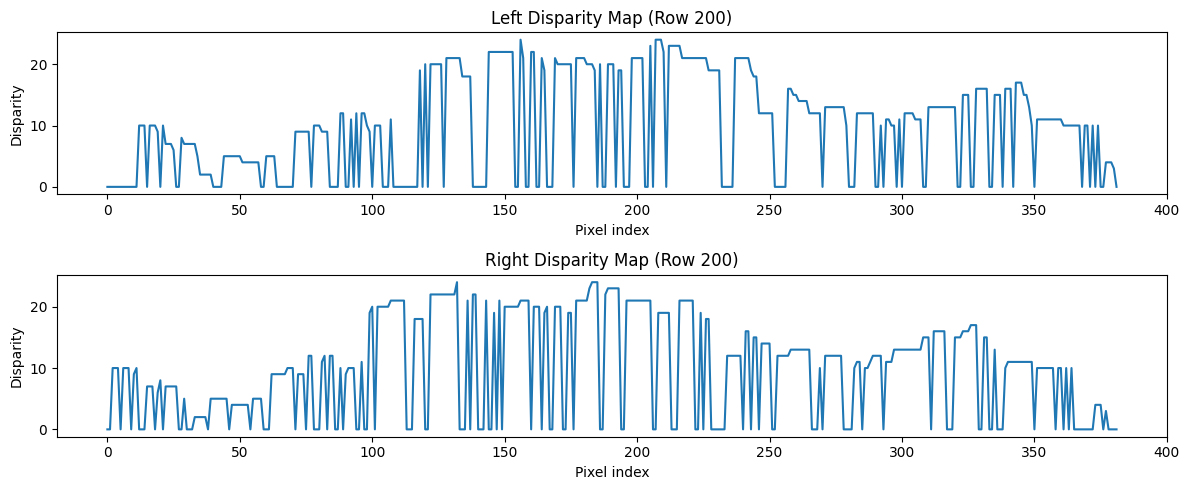

In [6]:
row=200
disp_left,disp_right=backtracking(Ileft,Iright,row)
plt.figure(figsize=(12, 5))
plt.subplot(2,1,1)
plt.plot(disp_left)
plt.title('Left Disparity Map (Row {})'.format(row))
plt.xlabel('Pixel index')
plt.ylabel('Disparity')
plt.subplot(2,1,2)
plt.plot(disp_right)
plt.title('Right Disparity Map (Row {})'.format(row))
plt.xlabel('Pixel index')
plt.ylabel('Disparity')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
height, width = Ileft.shape
# Initialize full disparity image
disparity_image = np.zeros((height, width), dtype=float)
# Loop over every row
for row in range(height):
    disp_left, disp_right = backtracking(Ileft, Iright, row)
    disparity_image[row, :] = disp_left  # take disp_left only
# Normalize and show disparity map
disparity_image_normalized = (disparity_image / np.max(disparity_image) * 255).astype(np.uint8)
# Plotting the disparity map


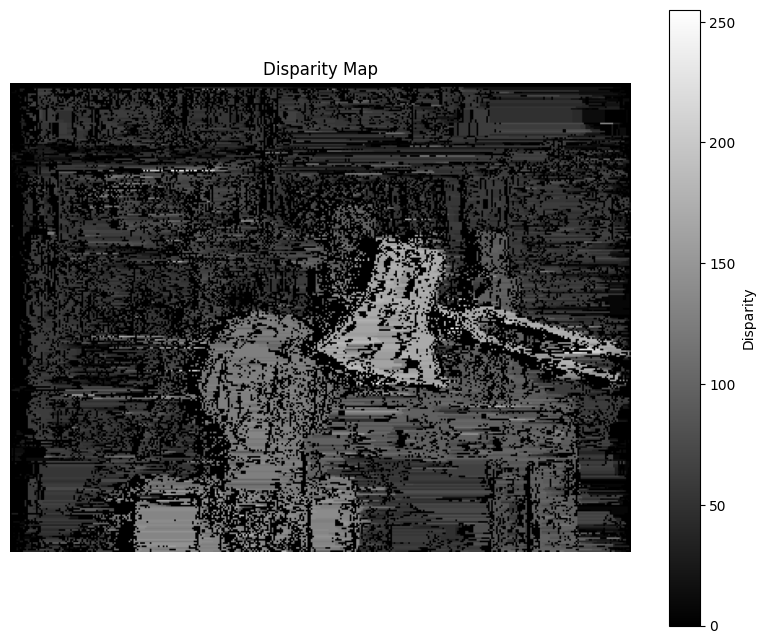

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(disparity_image_normalized, cmap='gray')
plt.colorbar(label='Disparity')
plt.title('Disparity Map')
plt.axis('off')
plt.show()

Left image shape: (375, 450)
Right image shape: (375, 450)


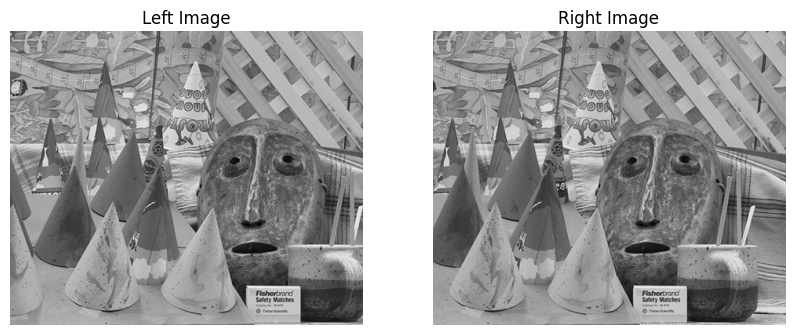

In [11]:
import cv2
import matplotlib.pyplot as plt
# Load images
l_path = "l2.png"
r_path = "r2.png"
Ileft = cv2.imread(l_path, cv2.IMREAD_GRAYSCALE)
Iright = cv2.imread(r_path, cv2.IMREAD_GRAYSCALE)
# Print size
print("Left image shape:", Ileft.shape)
print("Right image shape:", Iright.shape)
# Plot images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Ileft, cmap='gray')
plt.title('Left Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(Iright, cmap='gray')
plt.title('Right Image')
plt.axis('off')
plt.show()


C:\Users\mohamed ahmed\AppData\Local\Temp\ipykernel_35148\3461464341.py:4: RuntimeWarning: overflow encountered in scalar subtract
  d=(a-b)**2


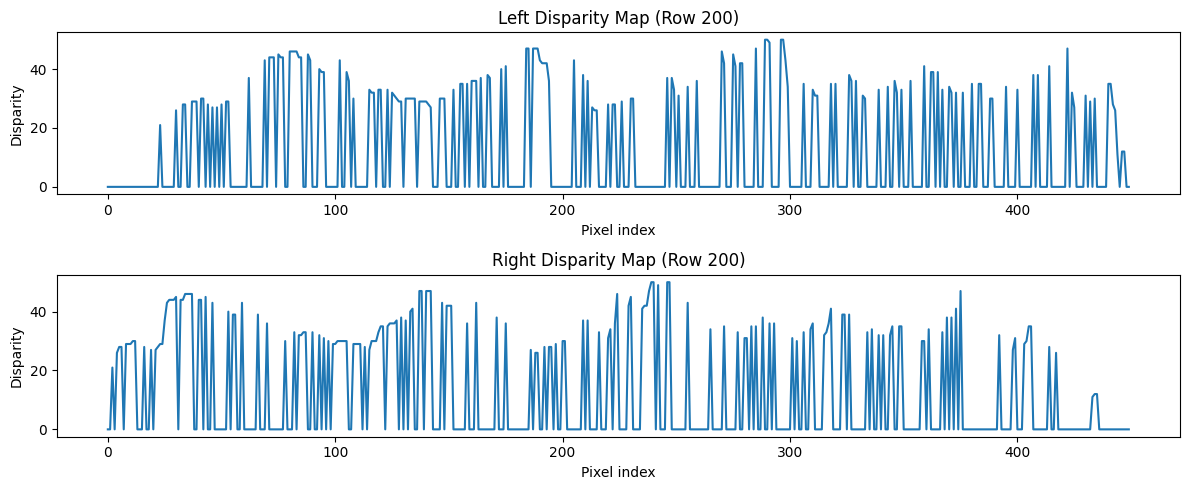

In [12]:
row=200
disp_left,disp_right=backtracking(Ileft,Iright,row)
plt.figure(figsize=(12, 5))
plt.subplot(2,1,1)
plt.plot(disp_left)
plt.title('Left Disparity Map (Row {})'.format(row))
plt.xlabel('Pixel index')
plt.ylabel('Disparity')
plt.subplot(2,1,2)
plt.plot(disp_right)
plt.title('Right Disparity Map (Row {})'.format(row))
plt.xlabel('Pixel index')
plt.ylabel('Disparity')
plt.tight_layout()
plt.show()

In [13]:
import matplotlib.pyplot as plt
height, width = Ileft.shape
# Initialize full disparity image
disparity_image = np.zeros((height, width), dtype=float)
# Loop over every row
for row in range(height):
    disp_left, disp_right = backtracking(Ileft, Iright, row)
    disparity_image[row, :] = disp_left  # take disp_left only
# Normalize and show disparity map
disparity_image_normalized = (disparity_image / np.max(disparity_image) * 255).astype(np.uint8)



C:\Users\mohamed ahmed\AppData\Local\Temp\ipykernel_35148\3461464341.py:4: RuntimeWarning: overflow encountered in scalar subtract
  d=(a-b)**2


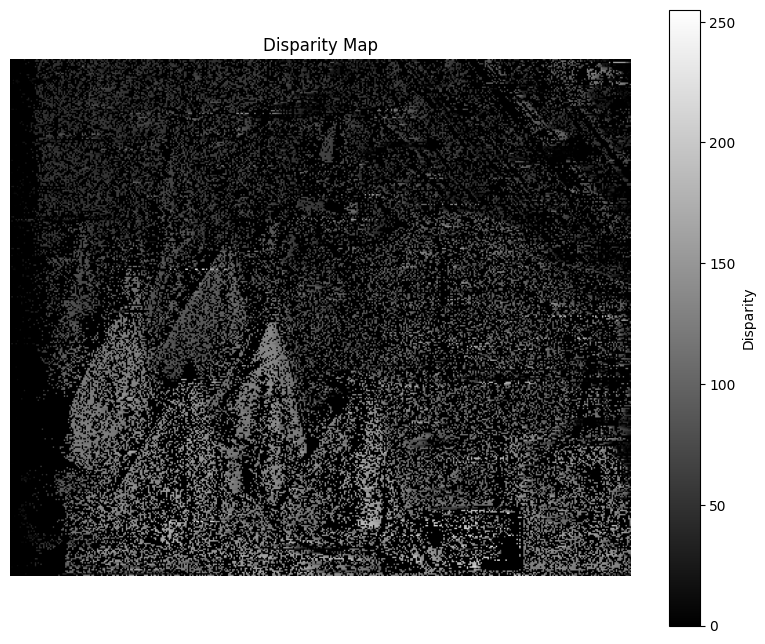

In [14]:
plt.figure(figsize=(10, 8))
plt.imshow(disparity_image_normalized, cmap='gray')
plt.colorbar(label='Disparity')
plt.title('Disparity Map')
plt.axis('off')
plt.show()

Left image shape: (375, 450)
Right image shape: (375, 450)


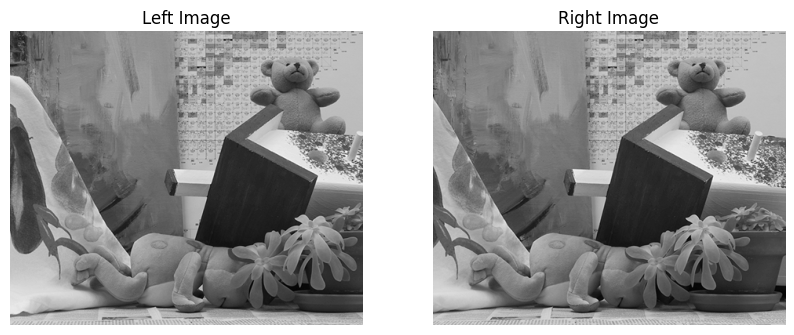

In [19]:
import cv2
import matplotlib.pyplot as plt
# Load images
l_path = "l3.png"
r_path = "r3.png"
Ileft = cv2.imread(l_path, cv2.IMREAD_GRAYSCALE)
Iright = cv2.imread(r_path, cv2.IMREAD_GRAYSCALE)
# Print size
print("Left image shape:", Ileft.shape)
print("Right image shape:", Iright.shape)
# Plot images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Ileft, cmap='gray')
plt.title('Left Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(Iright, cmap='gray')
plt.title('Right Image')
plt.axis('off')
plt.show()


C:\Users\mohamed ahmed\AppData\Local\Temp\ipykernel_35148\3461464341.py:4: RuntimeWarning: overflow encountered in scalar subtract
  d=(a-b)**2


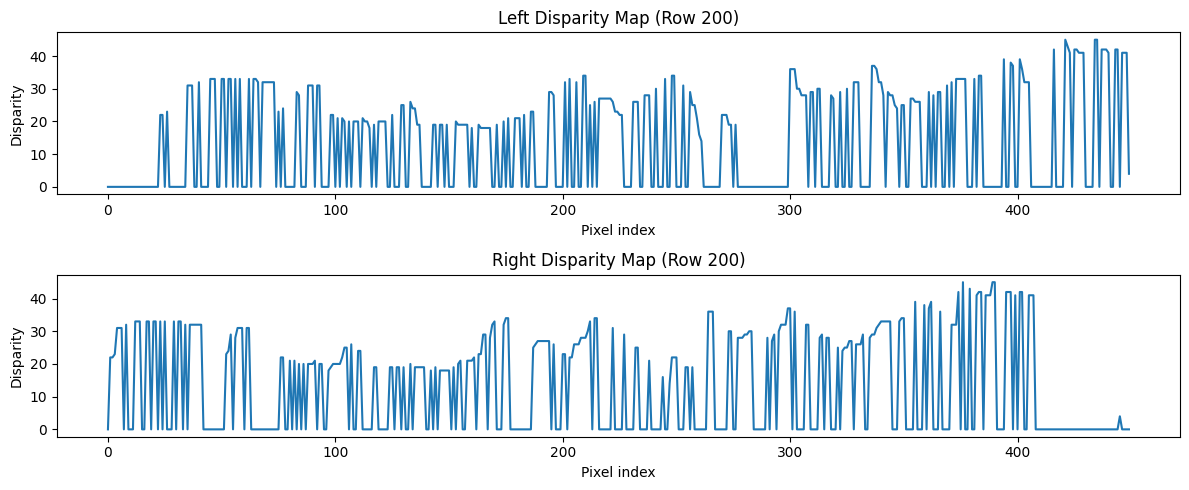

In [20]:
row=200
disp_left,disp_right=backtracking(Ileft,Iright,row)
plt.figure(figsize=(12, 5))
plt.subplot(2,1,1)
plt.plot(disp_left)
plt.title('Left Disparity Map (Row {})'.format(row))
plt.xlabel('Pixel index')
plt.ylabel('Disparity')
plt.subplot(2,1,2)
plt.plot(disp_right)
plt.title('Right Disparity Map (Row {})'.format(row))
plt.xlabel('Pixel index')
plt.ylabel('Disparity')
plt.tight_layout()
plt.show()

In [21]:
import matplotlib.pyplot as plt
height, width = Ileft.shape
# Initialize full disparity image
disparity_image = np.zeros((height, width), dtype=float)
# Loop over every row
for row in range(height):
    disp_left, disp_right = backtracking(Ileft, Iright, row)
    disparity_image[row, :] = disp_left  # take disp_left only
# Normalize and show disparity map
disparity_image_normalized = (disparity_image / np.max(disparity_image) * 255).astype(np.uint8)



C:\Users\mohamed ahmed\AppData\Local\Temp\ipykernel_35148\3461464341.py:4: RuntimeWarning: overflow encountered in scalar subtract
  d=(a-b)**2


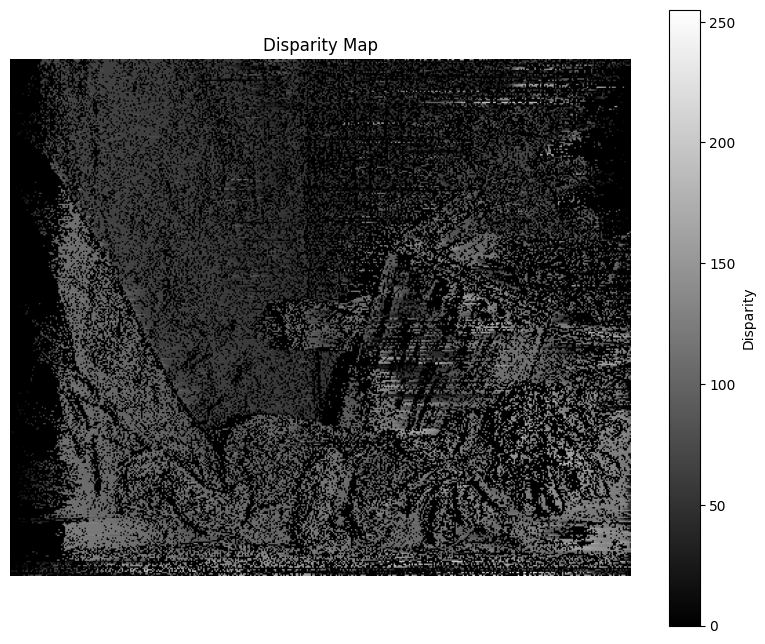

In [22]:
plt.figure(figsize=(10, 8))
plt.imshow(disparity_image_normalized, cmap='gray') 
plt.colorbar(label='Disparity')
plt.title('Disparity Map')
plt.axis('off')
plt.show()